In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 
import random 
import time 
from mpl_toolkits.mplot3d import Axes3D 

### 1. 


### $H_0: p = 0,01$ 

### $H_1: p > 0,01$ 

Zakładamy, że prawdziwa jest $H_1$. 

In [2]:
α = 0.05 
p0 = 0.01 
z_α = stats.norm.ppf(0.95, 0, 1)
z_α 

1.6448536269514722

In [3]:
sample_sizes = np.array([30, 50, 100, 200, 500, 1000])
print(sample_sizes) 
p1s = np.array( [p0 + 0.002, p0 + 0.005] + list(np.arange(p0 + 0.01, p0 + 0.1, 0.01)) )
print(p1s) 

[  30   50  100  200  500 1000]
[0.012 0.015 0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1  ]


### norm 0.01

In [4]:
st = time.time() 

powers_total_norm_01 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n
        z_values = (proportion_estimates - p0) / np.sqrt(p0 * (1 - p0) / n)
        decisions = (z_values < z_α).astype(int)
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_norm_01 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 6.234349012374878 seconds


In [5]:
a1 = [p1s[0]] * len(sample_sizes)

for i in range(1, len(p1s)): 
    a1 += [list(p1s)[i]] * len(sample_sizes)

b1 = list(pd.Series(a1).round(3)) 

d1 = {"p1": b1, "n": list(sample_sizes) * len(p1s), "power": powers_total_norm_01}
df1 = pd.DataFrame(d1) 

df11 = df1
df11["n"] = df11["n"].astype(str) 

df111 = df11.pivot_table(values = "power", index = "p1", columns = "n") 

df111 = df111[[str(n) for n in sample_sizes]] 

<IPython.core.display.Javascript object>


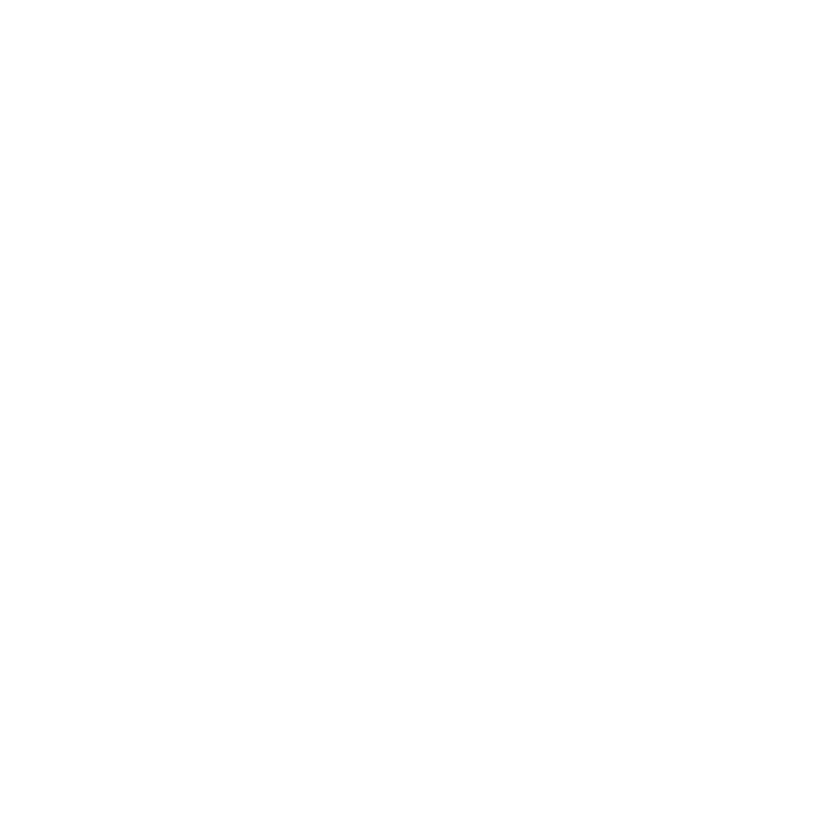

In [6]:
%matplotlib notebook

n_mesh_norm_01, p1_mesh_norm_01 = np.meshgrid(sample_sizes, p1s) 

powers_mesh_norm_01 = np.array(powers_total_norm_01).reshape(len(p1s), len(sample_sizes)) 

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_norm_01, p1_mesh_norm_01, powers_mesh_norm_01, color = 'tab:blue', alpha = 0.7) 
 
ax.set_xlabel('Sample Size (n)')
ax.set_ylabel('p1 Value')
ax.set_zlabel('Power')
ax.set_title('Power vs Sample Size and p1 Value') 

plt.show()

### binom 0.01 

In [18]:
st = time.time() 

powers_total_binom_01 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n)) 
        ys = samples.sum(axis = 1) 
        
        decisions = [None] * 10000
        
        for i, y in enumerate(ys): 
            result = stats.binomtest(y, n, p0, alternative = "greater")
            if (result.pvalue <= α): 
                decisions[i] = 0 
            else: 
                decisions[i] = 1 
              
        type_II_error_sim = np.mean(decisions)
        power_sim = 1 - type_II_error_sim 
        
        powers_per_n[k] = power_sim 
    
    powers_total_binom_01 += powers_per_n 
    
print()
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds') 


Execution time: 104.65273356437683 seconds


In [19]:
a2 = [p1s[0]] * len(sample_sizes)

for i in range(1, len(p1s)): 
    a2 += [list(p1s)[i]] * len(sample_sizes)

b2 = list(pd.Series(a2).round(3))

d2 = {"p1": b2, "n": list(sample_sizes) * len(p1s), "power": powers_total_binom_01}
df2 = pd.DataFrame(d2)

df22 = df2
df22["n"] = df22["n"].astype(str)

df222 = df22.pivot_table(values = "power", index = "p1", columns = "n")

df222 = df222[[str(n) for n in sample_sizes]] 

<IPython.core.display.Javascript object>


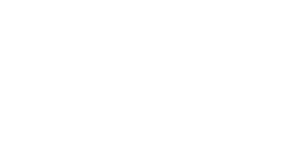

In [20]:
%matplotlib notebook

n_mesh_binom_01, p1_mesh_binom_01 = np.meshgrid(sample_sizes, p1s) 

powers_mesh_binom_01 = np.array(powers_total_binom_01).reshape(len(p1s), len(sample_sizes)) 

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_binom_01, p1_mesh_binom_01, powers_mesh_binom_01, color = 'tab:blue', alpha = 0.7) 
 
ax.set_xlabel('n')
ax.set_ylabel('p1')
ax.set_zlabel('power')
ax.set_title('Power vs Sample Size and p1') 

plt.show()

### difference 0.01

In [21]:
import matplotlib as mpl
mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams["font.style"] = "normal"

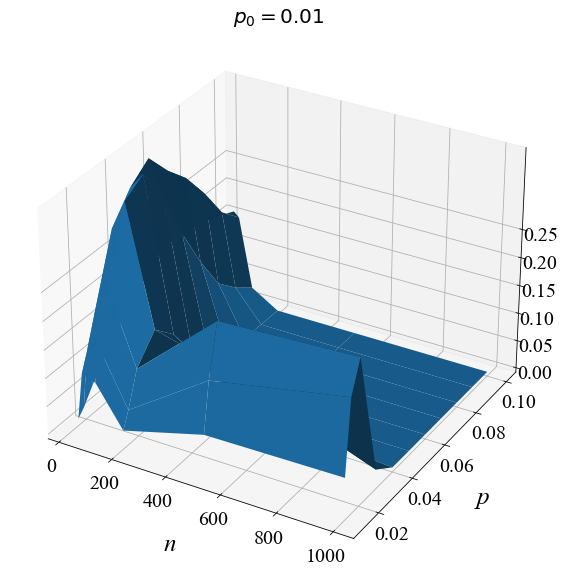

In [22]:
#%matplotlib notebook
%matplotlib inline

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_norm_01, p1_mesh_norm_01, powers_mesh_norm_01 - powers_mesh_binom_01, color = 'tab:blue', alpha = 1) 

# Set labels and title
ax.set_xlabel('n', fontsize = 25, labelpad = 20, fontstyle = 'italic')
ax.set_ylabel('p', fontsize = 25, labelpad = 20, fontstyle = 'italic')
#ax.set_zlabel('power', fontsize = 20, rotation = 150, labelpad = 20, fontstyle = 'italic') 
ax.set_title("$p_0 = 0.01$", fontsize = 20, fontstyle = 'italic') 
#z_label = ax.text2D(.95, .83, 'power', fontsize = 25, fontstyle = 'italic',
                    #transform = ax.transAxes, rotation = 360)

plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 

ax.set_zticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])
ax.set_zticklabels(['0.00', '0.05', '0.10', '0.15', '0.20', '0.25'], fontsize = 20)

ax.view_init(elev = 30, azim = -60)

plt.show()

### 2. 


### $H_0: p = 0,02$ 

### $H_1: p > 0,02$ 

Zakładamy, że prawdziwa jest $H_1$. 

In [23]:
α = 0.05 
p0 = 0.02 
z_α = stats.norm.ppf(0.95, 0, 1)
z_α 

1.6448536269514722

In [24]:
sample_sizes = np.array([30, 50, 100, 200, 500, 1000])
print(sample_sizes) 
p1s = np.array( [p0 + 0.002, p0 + 0.005] + list(np.arange(p0 + 0.01, p0 + 0.1, 0.01)) )
print(p1s) 

[  30   50  100  200  500 1000]
[0.022 0.025 0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11 ]


### norm 0.02

In [25]:
st = time.time() 

powers_total_norm_02 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n
        z_values = (proportion_estimates - p0) / np.sqrt(p0 * (1 - p0) / n)
        decisions = (z_values < z_α).astype(int)
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_norm_02 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 6.1044020652771 seconds


In [26]:
a3 = [p1s[0]] * len(sample_sizes)

for i in range(1, len(p1s)): 
    a3 += [list(p1s)[i]] * len(sample_sizes)

b3 = list(pd.Series(a3).round(3)) 

d3 = {"p1": b3, "n": list(sample_sizes) * len(p1s), "power": powers_total_norm_02}
df3 = pd.DataFrame(d3) 

df33 = df3 
df33["n"] = df33["n"].astype(str) 

df333 = df33.pivot_table(values = "power", index = "p1", columns = "n") 

df333 = df333[[str(n) for n in sample_sizes]] 

<IPython.core.display.Javascript object>


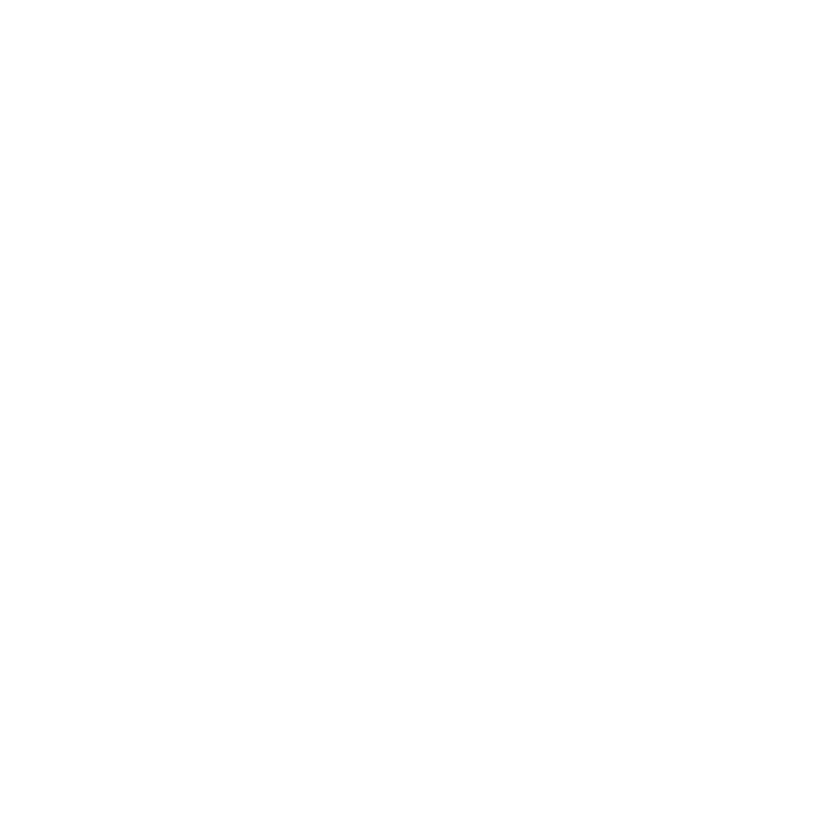

In [27]:
%matplotlib notebook

n_mesh_norm_02, p1_mesh_norm_02 = np.meshgrid(sample_sizes, p1s) 

powers_mesh_norm_02 = np.array(powers_total_norm_02).reshape(len(p1s), len(sample_sizes)) 

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_norm_02, p1_mesh_norm_02, powers_mesh_norm_02, color = 'tab:blue', alpha = 0.7) 

ax.set_xlabel('n')
ax.set_ylabel('p1')
ax.set_zlabel('power')
ax.set_title('Power vs Sample Size and p1') 

plt.show()

### binom 0.02

In [28]:
st = time.time() 

powers_total_binom_02 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n)) 
        ys = samples.sum(axis = 1) 
        
        decisions = [None] * 10000
        
        for i, y in enumerate(ys): 
            result = stats.binomtest(y, n, p0, alternative = "greater")
            if (result.pvalue <= α): 
                decisions[i] = 0 
            else: 
                decisions[i] = 1 
              
        type_II_error_sim = np.mean(decisions)
        power_sim = 1 - type_II_error_sim 
        
        powers_per_n[k] = power_sim 
    
    powers_total_binom_02 += powers_per_n 
    
print()
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds') 


Execution time: 106.26228451728821 seconds


In [29]:
a4 = [p1s[0]] * len(sample_sizes)

for i in range(1, len(p1s)): 
    a4 += [list(p1s)[i]] * len(sample_sizes)

b4 = list(pd.Series(a4).round(3))

d4 = {"p1": b4, "n": list(sample_sizes) * len(p1s), "power": powers_total_binom_02}
df4 = pd.DataFrame(d4)

df44 = df4
df44["n"] = df44["n"].astype(str)

df444 = df44.pivot_table(values = "power", index = "p1", columns = "n")

df444 = df444[[str(n) for n in sample_sizes]] 

<IPython.core.display.Javascript object>


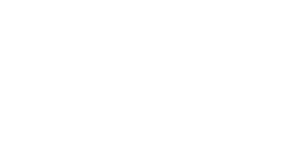

In [30]:
%matplotlib notebook

n_mesh_binom_02, p1_mesh_binom_02 = np.meshgrid(sample_sizes, p1s) 

powers_mesh_binom_02 = np.array(powers_total_binom_02).reshape(len(p1s), len(sample_sizes)) 

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_binom_02, p1_mesh_binom_02, powers_mesh_binom_02, color = 'tab:blue', alpha = 0.7) 
 
ax.set_xlabel('n')
ax.set_ylabel('p1')
ax.set_zlabel('power')
ax.set_title('Power vs Sample Size and p1') 

plt.show()

### difference 0.02

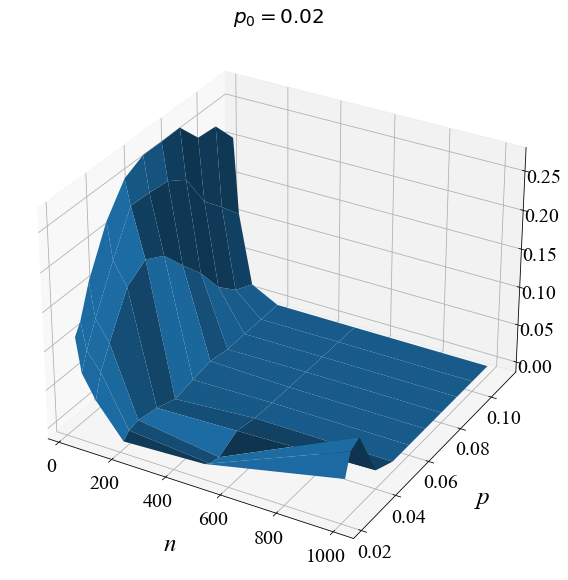

In [31]:
%matplotlib notebook
%matplotlib inline

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_norm_02, p1_mesh_norm_02, powers_mesh_norm_02 - powers_mesh_binom_02, color = 'tab:blue', alpha = 1) 

# Set labels and title
ax.set_xlabel('n', fontsize = 25, labelpad = 20, fontstyle = 'italic')
ax.set_ylabel('p', fontsize = 25, labelpad = 20, fontstyle = 'italic')
#ax.set_zlabel('power', fontsize = 20, rotation = 150, labelpad = 20, fontstyle = 'italic') 
ax.set_title("$p_0 = 0.02$", fontsize = 20, fontstyle = 'italic') 
#z_label = ax.text2D(.95, .83, 'power', fontsize = 25, fontstyle = 'italic',
                    #transform = ax.transAxes, rotation = 360)

plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 

ax.set_zticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])
ax.set_zticklabels(['0.00', '0.05', '0.10', '0.15', '0.20', '0.25'], fontsize = 20)

ax.view_init(elev = 30, azim = -60)

plt.show()

### 3. 


### $H_0: p = 0,03$ 

### $H_1: p > 0,03$ 

Zakładamy, że prawdziwa jest $H_1$. 

In [32]:
α = 0.05 
p0 = 0.03 
z_α = stats.norm.ppf(0.95, 0, 1)
z_α 

1.6448536269514722

In [33]:
sample_sizes = np.array([30, 50, 100, 200, 500, 1000])
print(sample_sizes) 
p1s = np.array( [p0 + 0.002, p0 + 0.005] + list(np.arange(p0 + 0.01, p0 + 0.1, 0.01)) )
print(p1s) 

[  30   50  100  200  500 1000]
[0.032 0.035 0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11  0.12 ]


### norm 0.03

In [34]:
st = time.time() 

powers_total_norm_03 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n
        z_values = (proportion_estimates - p0) / np.sqrt(p0 * (1 - p0) / n)
        decisions = (z_values < z_α).astype(int)
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_norm_03 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 6.0136330127716064 seconds


In [35]:
a5 = [p1s[0]] * len(sample_sizes)

for i in range(1, len(p1s)): 
    a5 += [list(p1s)[i]] * len(sample_sizes)

b5 = list(pd.Series(a5).round(3)) 

d5 = {"p1": b5, "n": list(sample_sizes) * len(p1s), "power": powers_total_norm_03}
df5 = pd.DataFrame(d5) 

df55 = df5
df55["n"] = df55["n"].astype(str) 

df555 = df55.pivot_table(values = "power", index = "p1", columns = "n") 

df555 = df555[[str(n) for n in sample_sizes]] 

<IPython.core.display.Javascript object>


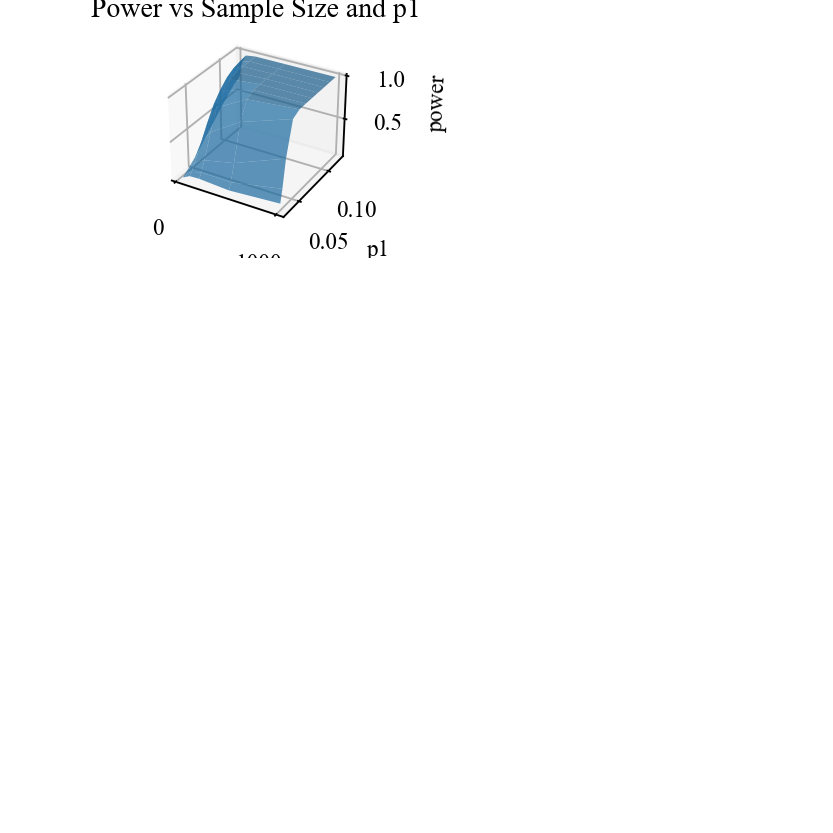

In [36]:
%matplotlib notebook

n_mesh_norm_03, p1_mesh_norm_03 = np.meshgrid(sample_sizes, p1s) 

powers_mesh_norm_03 = np.array(powers_total_norm_03).reshape(len(p1s), len(sample_sizes)) 

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_norm_03, p1_mesh_norm_03, powers_mesh_norm_03, color = 'tab:blue', alpha = 0.7) 

ax.set_xlabel('n')
ax.set_ylabel('p1')
ax.set_zlabel('power')
ax.set_title('Power vs Sample Size and p1') 

plt.show()

### binom 0.03

In [37]:
st = time.time() 

powers_total_binom_03 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n)) 
        ys = samples.sum(axis = 1) 
        
        decisions = [None] * 10000
        
        for i, y in enumerate(ys): 
            result = stats.binomtest(y, n, p0, alternative = "greater")
            if (result.pvalue <= α): 
                decisions[i] = 0 
            else: 
                decisions[i] = 1 
              
        type_II_error_sim = np.mean(decisions)
        power_sim = 1 - type_II_error_sim 
        
        powers_per_n[k] = power_sim 
    
    powers_total_binom_03 += powers_per_n 
    
print()
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds') 


Execution time: 104.17083764076233 seconds


In [38]:
a6 = [p1s[0]] * len(sample_sizes)

for i in range(1, len(p1s)): 
    a6 += [list(p1s)[i]] * len(sample_sizes)

b6 = list(pd.Series(a6).round(3))

d6 = {"p1": b6, "n": list(sample_sizes) * len(p1s), "power": powers_total_binom_03}
df6 = pd.DataFrame(d6)

df66 = df6
df66["n"] = df66["n"].astype(str)

df666 = df66.pivot_table(values = "power", index = "p1", columns = "n")

df666 = df666[[str(n) for n in sample_sizes]] 

<IPython.core.display.Javascript object>


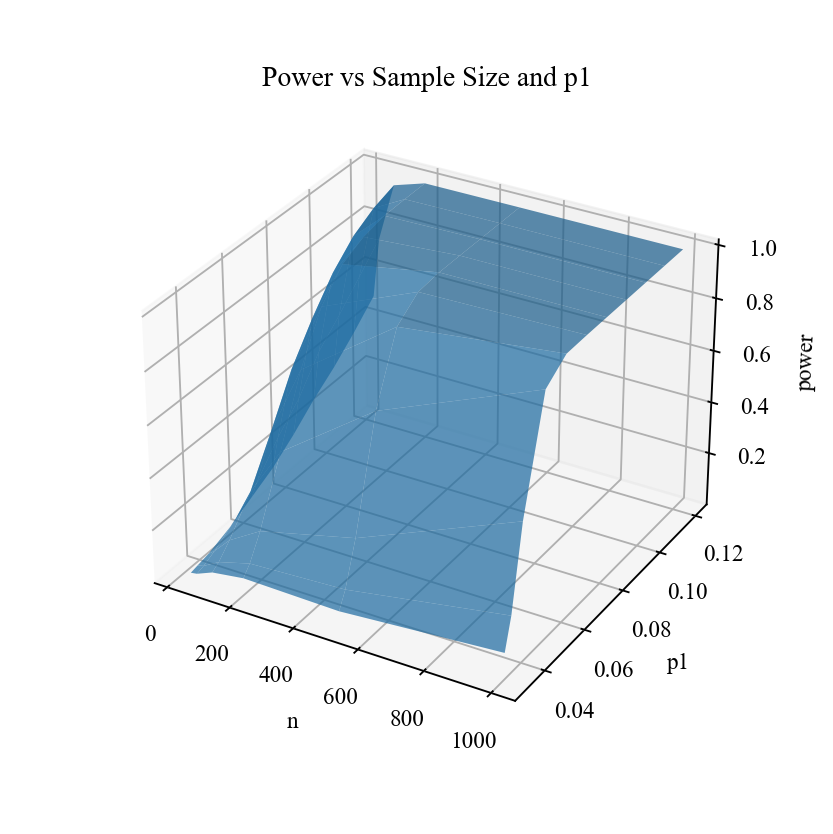

In [39]:
%matplotlib notebook

n_mesh_binom_03, p1_mesh_binom_03 = np.meshgrid(sample_sizes, p1s) 

powers_mesh_binom_03 = np.array(powers_total_binom_03).reshape(len(p1s), len(sample_sizes)) 

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_binom_03, p1_mesh_binom_03, powers_mesh_binom_03, color = 'tab:blue', alpha = 0.7) 
 
ax.set_xlabel('n')
ax.set_ylabel('p1')
ax.set_zlabel('power')
ax.set_title('Power vs Sample Size and p1') 

plt.show()

### difference 0.03

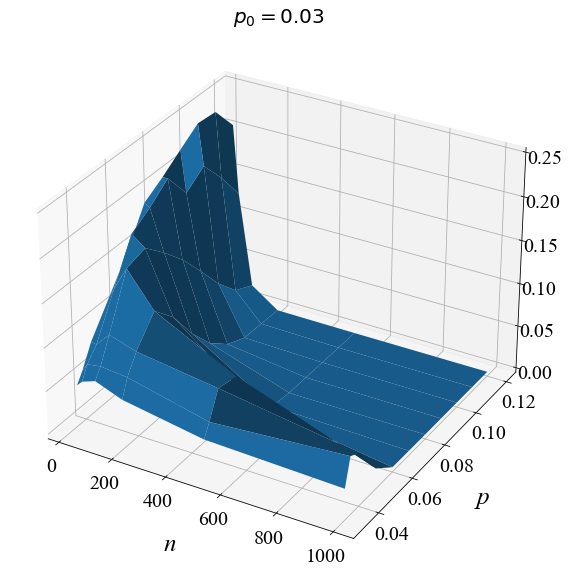

In [40]:
#%matplotlib notebook
%matplotlib inline

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_norm_03, p1_mesh_norm_03, powers_mesh_norm_03 - powers_mesh_binom_03, color = 'tab:blue', alpha = 1) 

# Set labels and title
ax.set_xlabel('n', fontsize = 25, labelpad = 20, fontstyle = 'italic')
ax.set_ylabel('p', fontsize = 25, labelpad = 20, fontstyle = 'italic')
#ax.set_zlabel('power', fontsize = 20, rotation = 150, labelpad = 20, fontstyle = 'italic') 
ax.set_title("$p_0 = 0.03$", fontsize = 20, fontstyle = 'italic') 
#z_label = ax.text2D(.95, .83, 'power', fontsize = 25, fontstyle = 'italic',
                    #transform = ax.transAxes, rotation = 360)

plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 

ax.set_zticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])
ax.set_zticklabels(['0.00', '0.05', '0.10', '0.15', '0.20', '0.25'], fontsize = 20)

ax.view_init(elev = 30, azim = -60)

plt.show()

### 4. 


### $H_0: p = 0,04$ 

### $H_1: p > 0,04$ 

Zakładamy, że prawdziwa jest $H_1$. 

In [41]:
α = 0.05 
p0 = 0.04
z_α = stats.norm.ppf(0.95, 0, 1)
print(z_α) 

sample_sizes = np.array([30, 50, 100, 200, 500, 1000])
print(sample_sizes) 
p1s = np.array( [p0 + 0.002, p0 + 0.005] + list(np.arange(p0 + 0.01, p0 + 0.1, 0.01)) )
print(p1s) 

1.6448536269514722
[  30   50  100  200  500 1000]
[0.042 0.045 0.05  0.06  0.07  0.08  0.09  0.1   0.11  0.12  0.13 ]


### norm 0.04

In [42]:
st = time.time() 

powers_total_norm_04 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n
        z_values = (proportion_estimates - p0) / np.sqrt(p0 * (1 - p0) / n)
        decisions = (z_values < z_α).astype(int)
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_norm_04 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 6.106698751449585 seconds


In [43]:
a7 = [p1s[0]] * len(sample_sizes)

for i in range(1, len(p1s)): 
    a7 += [list(p1s)[i]] * len(sample_sizes)

b7 = list(pd.Series(a7).round(3)) 

d7 = {"p1": b7, "n": list(sample_sizes) * len(p1s), "power": powers_total_norm_04}
df7 = pd.DataFrame(d7) 

df77 = df7
df77["n"] = df77["n"].astype(str) 

df777 = df77.pivot_table(values = "power", index = "p1", columns = "n") 

df777 = df777[[str(n) for n in sample_sizes]] 

<IPython.core.display.Javascript object>


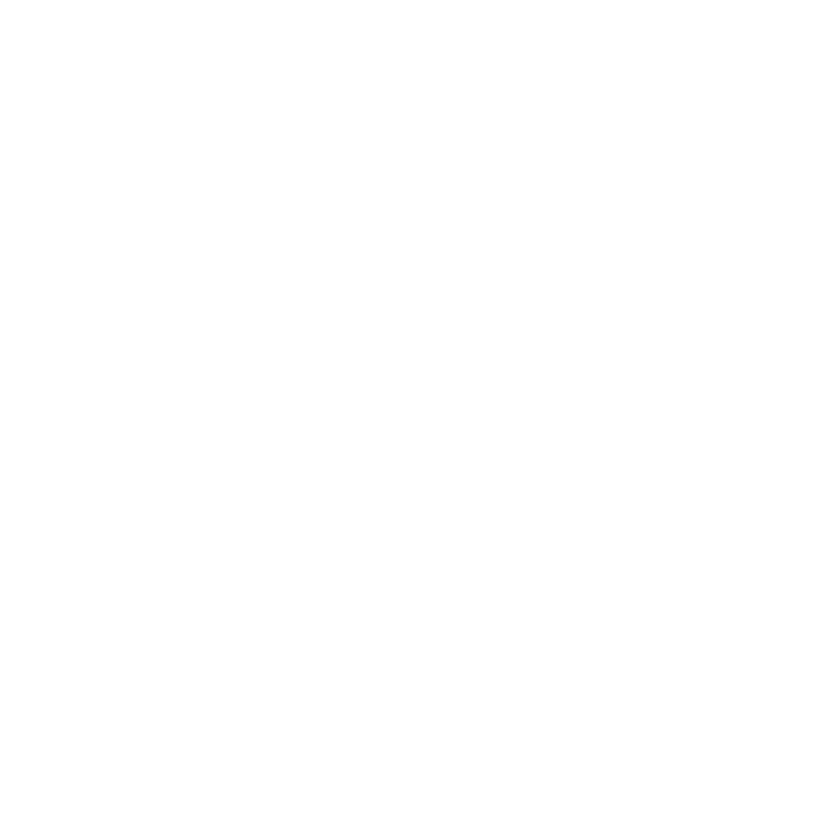

In [44]:
%matplotlib notebook

n_mesh_norm_04, p1_mesh_norm_04 = np.meshgrid(sample_sizes, p1s) 

powers_mesh_norm_04 = np.array(powers_total_norm_04).reshape(len(p1s), len(sample_sizes)) 

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_norm_04, p1_mesh_norm_04, powers_mesh_norm_04, color = 'tab:blue', alpha = 0.7) 

ax.set_xlabel('n')
ax.set_ylabel('p1')
ax.set_zlabel('power')
ax.set_title('Power vs Sample Size and p1') 

plt.show()

### binom 0.04

In [45]:
st = time.time() 

powers_total_binom_04 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n)) 
        ys = samples.sum(axis = 1) 
        
        decisions = [None] * 10000
        
        for i, y in enumerate(ys): 
            result = stats.binomtest(y, n, p0, alternative = "greater")
            if (result.pvalue <= α): 
                decisions[i] = 0 
            else: 
                decisions[i] = 1 
              
        type_II_error_sim = np.mean(decisions)
        power_sim = 1 - type_II_error_sim 
        
        powers_per_n[k] = power_sim 
    
    powers_total_binom_04 += powers_per_n 
    
print()
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds') 


Execution time: 96.13320970535278 seconds


In [46]:
a8 = [p1s[0]] * len(sample_sizes)

for i in range(1, len(p1s)): 
    a8 += [list(p1s)[i]] * len(sample_sizes)

b8 = list(pd.Series(a8).round(3))

d8 = {"p1": b8, "n": list(sample_sizes) * len(p1s), "power": powers_total_binom_04}
df8 = pd.DataFrame(d8)

df88 = df8
df88["n"] = df88["n"].astype(str)

df888 = df88.pivot_table(values = "power", index = "p1", columns = "n")

df888 = df888[[str(n) for n in sample_sizes]] 

<IPython.core.display.Javascript object>


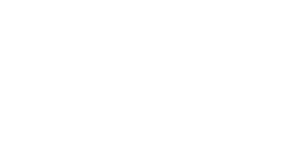

In [47]:
%matplotlib notebook

n_mesh_binom_04, p1_mesh_binom_04 = np.meshgrid(sample_sizes, p1s) 

powers_mesh_binom_04 = np.array(powers_total_binom_04).reshape(len(p1s), len(sample_sizes)) 

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_binom_04, p1_mesh_binom_04, powers_mesh_binom_04, color = 'tab:blue', alpha = 0.7) 
 
ax.set_xlabel('n')
ax.set_ylabel('p1')
ax.set_zlabel('power')
ax.set_title('Power vs Sample Size and p1') 

plt.show()

### difference 0.04

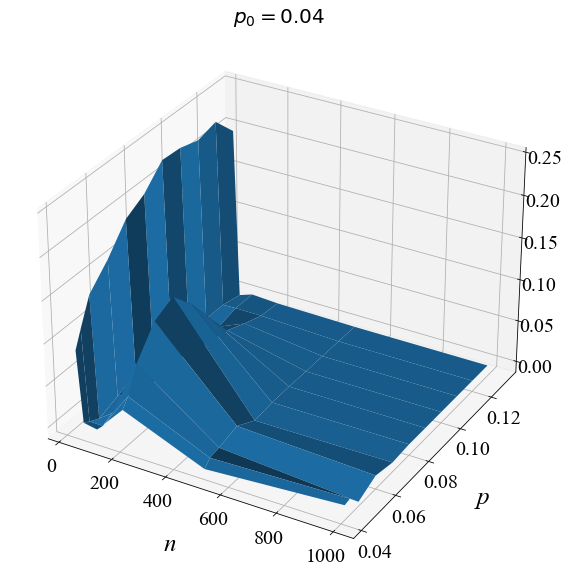

In [50]:
#%matplotlib notebook
%matplotlib inline

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_norm_04, p1_mesh_norm_04, powers_mesh_norm_04 - powers_mesh_binom_04, color = 'tab:blue', alpha = 1) 

# Set labels and title
ax.set_xlabel('n', fontsize = 25, labelpad = 20, fontstyle = 'italic')
ax.set_ylabel('p', fontsize = 25, labelpad = 20, fontstyle = 'italic')
#ax.set_zlabel('power', fontsize = 20, rotation = 150, labelpad = 20, fontstyle = 'italic') 
ax.set_title("$p_0 = 0.04$", fontsize = 20, fontstyle = 'italic') 
#z_label = ax.text2D(.95, .83, 'power', fontsize = 25, fontstyle = 'italic',
                    #transform = ax.transAxes, rotation = 360)

plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 

ax.set_zticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])
ax.set_zticklabels(['0.00', '0.05', '0.10', '0.15', '0.20', '0.25'], fontsize = 20)

ax.view_init(elev = 30, azim = -60)

plt.show()

### 5. 


### $H_0: p = 0,05$ 

### $H_1: p > 0,05$ 

Zakładamy, że prawdziwa jest $H_1$. 

In [51]:
α = 0.05 
p0 = 0.05
z_α = stats.norm.ppf(0.95, 0, 1)
print(z_α) 

sample_sizes = np.array([30, 50, 100, 200, 500, 1000])
print(sample_sizes) 
p1s = np.array( [p0 + 0.002, p0 + 0.005] + list(np.arange(p0 + 0.01, p0 + 0.1, 0.01)) )
print(p1s) 

1.6448536269514722
[  30   50  100  200  500 1000]
[0.052 0.055 0.06  0.07  0.08  0.09  0.1   0.11  0.12  0.13  0.14  0.15 ]


### norm 0.05

In [52]:
st = time.time() 

powers_total_norm_05 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n
        z_values = (proportion_estimates - p0) / np.sqrt(p0 * (1 - p0) / n)
        decisions = (z_values < z_α).astype(int)
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_norm_05 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 6.134298324584961 seconds


In [53]:
a9 = [p1s[0]] * len(sample_sizes)

for i in range(1, len(p1s)): 
    a9 += [list(p1s)[i]] * len(sample_sizes)

b9 = list(pd.Series(a9).round(3)) 

d9 = {"p1": b9, "n": list(sample_sizes) * len(p1s), "power": powers_total_norm_05}
df9 = pd.DataFrame(d9) 

df99 = df9
df99["n"] = df99["n"].astype(str) 

df999 = df99.pivot_table(values = "power", index = "p1", columns = "n") 

df999 = df999[[str(n) for n in sample_sizes]] 

<IPython.core.display.Javascript object>


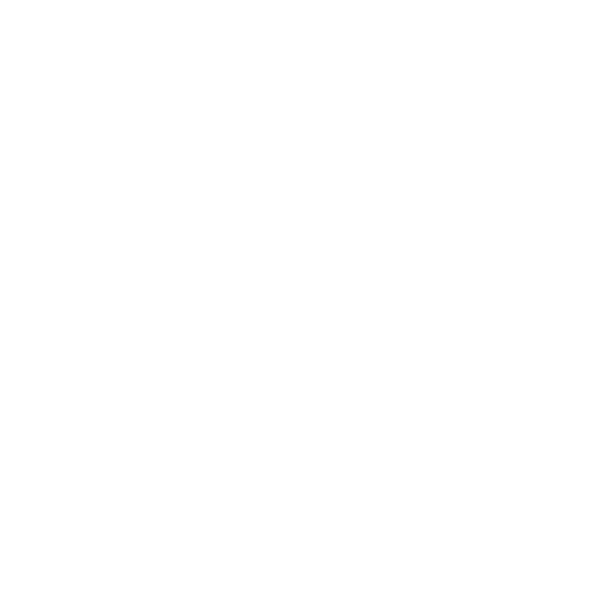

In [54]:
%matplotlib notebook

n_mesh_norm_05, p1_mesh_norm_05 = np.meshgrid(sample_sizes, p1s) 

powers_mesh_norm_05 = np.array(powers_total_norm_05).reshape(len(p1s), len(sample_sizes)) 

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_norm_05, p1_mesh_norm_05, powers_mesh_norm_05, color = 'tab:blue', alpha = 0.7) 

ax.set_xlabel('n')
ax.set_ylabel('p1')
ax.set_zlabel('power')
ax.set_title('Power vs Sample Size and p1') 

plt.show()

### binom 0.05

In [55]:
st = time.time() 

powers_total_binom_05 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n)) 
        ys = samples.sum(axis = 1) 
        
        decisions = [None] * 10000
        
        for i, y in enumerate(ys): 
            result = stats.binomtest(y, n, p0, alternative = "greater")
            if (result.pvalue <= α): 
                decisions[i] = 0 
            else: 
                decisions[i] = 1 
              
        type_II_error_sim = np.mean(decisions)
        power_sim = 1 - type_II_error_sim 
        
        powers_per_n[k] = power_sim 
    
    powers_total_binom_05 += powers_per_n 
    
print()
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds') 


Execution time: 98.95705008506775 seconds


In [56]:
a10 = [p1s[0]] * len(sample_sizes)

for i in range(1, len(p1s)): 
    a10 += [list(p1s)[i]] * len(sample_sizes)

b10 = list(pd.Series(a10).round(3))

d10 = {"p1": b10, "n": list(sample_sizes) * len(p1s), "power": powers_total_binom_05}
df10 = pd.DataFrame(d10)

df100 = df10
df100["n"] = df100["n"].astype(str)

df1000 = df100.pivot_table(values = "power", index = "p1", columns = "n")

df1000 = df1000[[str(n) for n in sample_sizes]] 

<IPython.core.display.Javascript object>


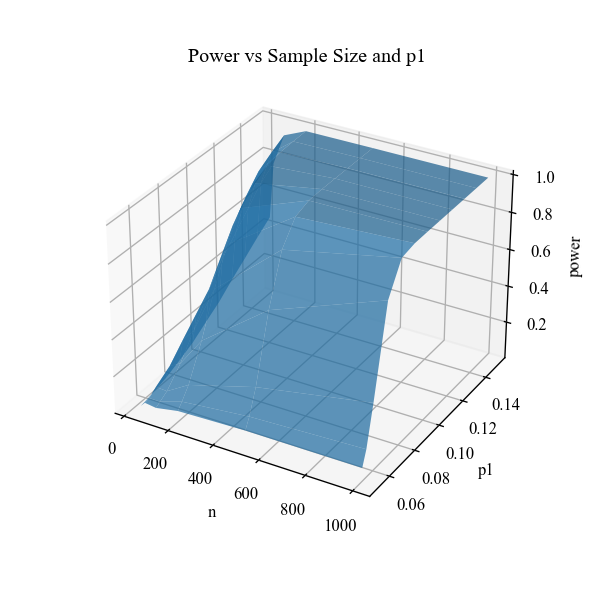

In [57]:
%matplotlib notebook

n_mesh_binom_05, p1_mesh_binom_05 = np.meshgrid(sample_sizes, p1s) 

powers_mesh_binom_05 = np.array(powers_total_binom_05).reshape(len(p1s), len(sample_sizes)) 

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_binom_05, p1_mesh_binom_05, powers_mesh_binom_05, color = 'tab:blue', alpha = 0.7) 
 
ax.set_xlabel('n')
ax.set_ylabel('p1')
ax.set_zlabel('power')
ax.set_title('Power vs Sample Size and p1') 

plt.show()

### difference 0.05

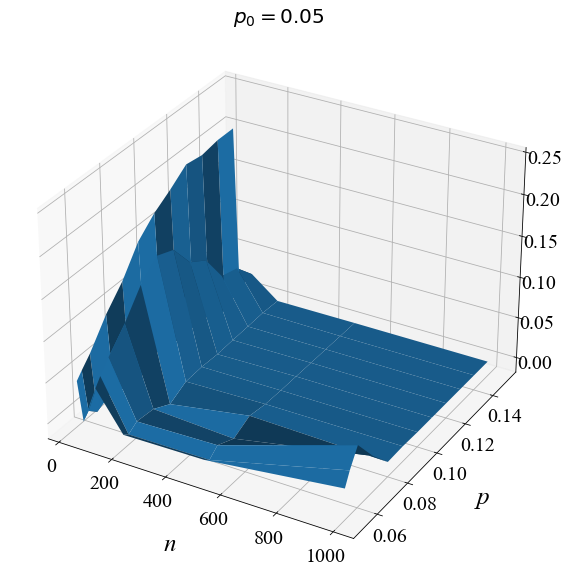

In [58]:
#%matplotlib notebook
%matplotlib inline

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_norm_05, p1_mesh_norm_05, powers_mesh_norm_05 - powers_mesh_binom_05, color = 'tab:blue', alpha = 1) 

# Set labels and title
ax.set_xlabel('n', fontsize = 25, labelpad = 20, fontstyle = 'italic')
ax.set_ylabel('p', fontsize = 25, labelpad = 20, fontstyle = 'italic')
#ax.set_zlabel('power', fontsize = 20, rotation = 150, labelpad = 20, fontstyle = 'italic') 
ax.set_title("$p_0 = 0.05$", fontsize = 20, fontstyle = 'italic') 
#z_label = ax.text2D(.95, .83, 'power', fontsize = 25, fontstyle = 'italic',
                    #transform = ax.transAxes, rotation = 360)

plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 

ax.set_zticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])
ax.set_zticklabels(['0.00', '0.05', '0.10', '0.15', '0.20', '0.25'], fontsize = 20)

ax.view_init(elev = 30, azim = -60)

plt.show()

### 6. 


### $H_0: p = 0,06$ 

### $H_1: p > 0,06$ 

Zakładamy, że prawdziwa jest $H_1$. 

In [59]:
α = 0.05 
p0 = 0.06
z_α = stats.norm.ppf(0.95, 0, 1)
print(z_α) 

sample_sizes = np.array([30, 50, 100, 200, 500, 1000])
print(sample_sizes) 
p1s = np.array( [p0 + 0.002, p0 + 0.005] + list(np.arange(p0 + 0.01, p0 + 0.1, 0.01)) )
print(p1s) 

1.6448536269514722
[  30   50  100  200  500 1000]
[0.062 0.065 0.07  0.08  0.09  0.1   0.11  0.12  0.13  0.14  0.15 ]


### norm 0.06

In [60]:
st = time.time() 

powers_total_norm_06 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n
        z_values = (proportion_estimates - p0) / np.sqrt(p0 * (1 - p0) / n)
        decisions = (z_values < z_α).astype(int)
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_norm_06 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 5.656050443649292 seconds


In [61]:
a011 = [p1s[0]] * len(sample_sizes)

for i in range(1, len(p1s)): 
    a011 += [list(p1s)[i]] * len(sample_sizes)

b011 = list(pd.Series(a011).round(3)) 

d011 = {"p1": b011, "n": list(sample_sizes) * len(p1s), "power": powers_total_norm_06}
df011 = pd.DataFrame(d011) 

df0111 = df011
df0111["n"] = df0111["n"].astype(str) 

df01111 = df0111.pivot_table(values = "power", index = "p1", columns = "n") 

df01111 = df01111[[str(n) for n in sample_sizes]] 

<IPython.core.display.Javascript object>


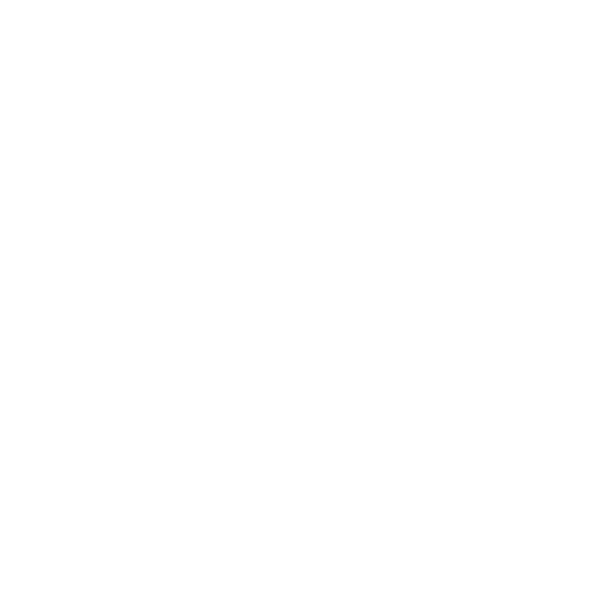

In [62]:
%matplotlib notebook

n_mesh_norm_06, p1_mesh_norm_06 = np.meshgrid(sample_sizes, p1s) 

powers_mesh_norm_06 = np.array(powers_total_norm_06).reshape(len(p1s), len(sample_sizes)) 

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_norm_06, p1_mesh_norm_06, powers_mesh_norm_06, color = 'tab:blue', alpha = 0.7) 

ax.set_xlabel('n')
ax.set_ylabel('p1')
ax.set_zlabel('power')
ax.set_title('Power vs Sample Size and p1') 

plt.show()

### binom 0.06

In [63]:
st = time.time() 

powers_total_binom_06 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n)) 
        ys = samples.sum(axis = 1) 
        
        decisions = [None] * 10000
        
        for i, y in enumerate(ys): 
            result = stats.binomtest(y, n, p0, alternative = "greater")
            if (result.pvalue <= α): 
                decisions[i] = 0 
            else: 
                decisions[i] = 1 
              
        type_II_error_sim = np.mean(decisions)
        power_sim = 1 - type_II_error_sim 
        
        powers_per_n[k] = power_sim 
    
    powers_total_binom_06 += powers_per_n 
    
print()
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds') 


Execution time: 92.20889925956726 seconds


In [64]:
a012 = [p1s[0]] * len(sample_sizes)

for i in range(1, len(p1s)): 
    a012 += [list(p1s)[i]] * len(sample_sizes)

b012 = list(pd.Series(a012).round(3))

d012 = {"p1": b012, "n": list(sample_sizes) * len(p1s), "power": powers_total_binom_06}
df012 = pd.DataFrame(d012)

df0122 = df012
df0122["n"] = df0122["n"].astype(str)

df01222 = df0122.pivot_table(values = "power", index = "p1", columns = "n")

df01222 = df01222[[str(n) for n in sample_sizes]] 

<IPython.core.display.Javascript object>


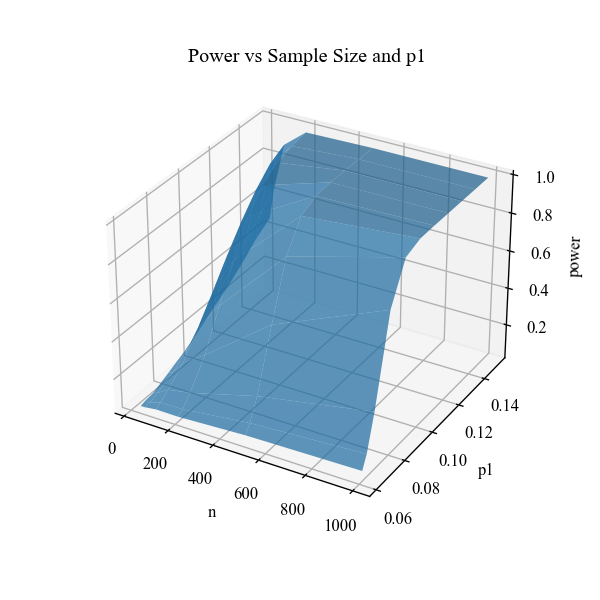

In [65]:
%matplotlib notebook

n_mesh_binom_06, p1_mesh_binom_06 = np.meshgrid(sample_sizes, p1s) 

powers_mesh_binom_06 = np.array(powers_total_binom_06).reshape(len(p1s), len(sample_sizes)) 

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_binom_06, p1_mesh_binom_06, powers_mesh_binom_06, color = 'tab:blue', alpha = 0.7) 
 
ax.set_xlabel('n')
ax.set_ylabel('p1')
ax.set_zlabel('power')
ax.set_title('Power vs Sample Size and p1') 

plt.show()

### difference 0.06

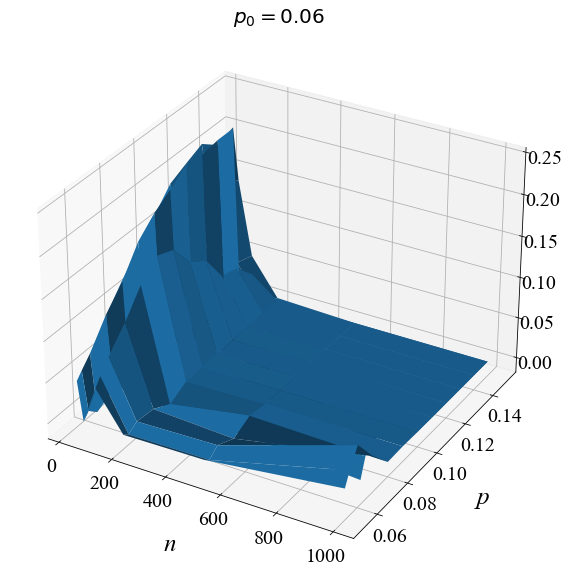

In [66]:
#%matplotlib notebook
%matplotlib inline

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_norm_06, p1_mesh_norm_06, powers_mesh_norm_06 - powers_mesh_binom_06, color = 'tab:blue', alpha = 1) 

ax.plot_surface(n_mesh_norm_05, p1_mesh_norm_05, powers_mesh_norm_05 - powers_mesh_binom_05, color = 'tab:blue', alpha = 1) 

# Set labels and title
ax.set_xlabel('n', fontsize = 25, labelpad = 20, fontstyle = 'italic')
ax.set_ylabel('p', fontsize = 25, labelpad = 20, fontstyle = 'italic')
#ax.set_zlabel('power', fontsize = 20, rotation = 150, labelpad = 20, fontstyle = 'italic') 
ax.set_title("$p_0 = 0.06$", fontsize = 20, fontstyle = 'italic') 
#z_label = ax.text2D(.95, .83, 'power', fontsize = 25, fontstyle = 'italic',
                    #transform = ax.transAxes, rotation = 360)

plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 

ax.set_zticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])
ax.set_zticklabels(['0.00', '0.05', '0.10', '0.15', '0.20', '0.25'], fontsize = 20)

ax.view_init(elev = 30, azim = -60)

plt.show()

### 10. 


### $H_0: p = 0,1$ 

### $H_1: p > 0,1$ 

Zakładamy, że prawdziwa jest $H_1$. 

In [67]:
α = 0.05 
p0 = 0.1
z_α = stats.norm.ppf(0.95, 0, 1)
print(z_α) 

sample_sizes = np.array([30, 50, 100, 200, 500, 1000])
print(sample_sizes) 
p1s = np.array( [p0 + 0.002, p0 + 0.005] + list(np.arange(p0 + 0.01, p0 + 0.1, 0.01)) )
print(p1s) 

1.6448536269514722
[  30   50  100  200  500 1000]
[0.102 0.105 0.11  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19 ]


### norm 0.1

In [68]:
st = time.time() 

powers_total_norm_1 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n
        z_values = (proportion_estimates - p0) / np.sqrt(p0 * (1 - p0) / n)
        decisions = (z_values < z_α).astype(int)
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_norm_1 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 6.093876838684082 seconds


<IPython.core.display.Javascript object>


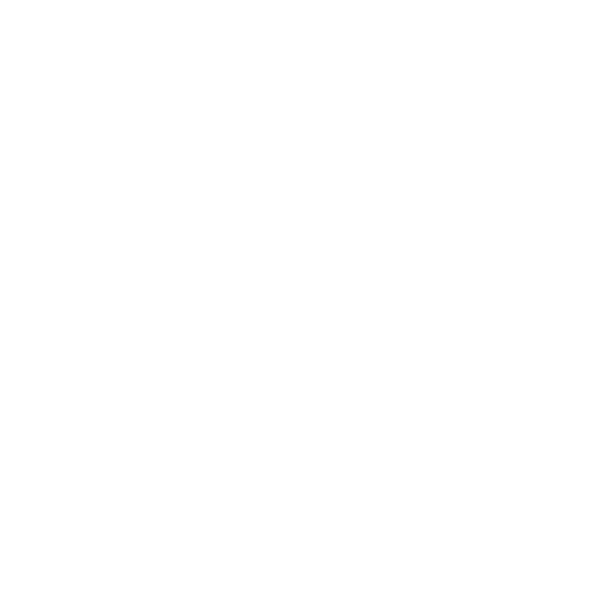

In [69]:
%matplotlib notebook

n_mesh_norm_1, p1_mesh_norm_1 = np.meshgrid(sample_sizes, p1s) 

powers_mesh_norm_1 = np.array(powers_total_norm_1).reshape(len(p1s), len(sample_sizes)) 

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_norm_1, p1_mesh_norm_1, powers_mesh_norm_1, color = 'tab:blue', alpha = 0.7) 

ax.set_xlabel('n')
ax.set_ylabel('p1')
ax.set_zlabel('power')
ax.set_title('Power vs Sample Size and p1') 

plt.show()

### binom 0.1

In [70]:
st = time.time() 

powers_total_binom_1 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n)) 
        ys = samples.sum(axis = 1) 
        
        decisions = [None] * 10000
        
        for i, y in enumerate(ys): 
            result = stats.binomtest(y, n, p0, alternative = "greater")
            if (result.pvalue <= α): 
                decisions[i] = 0 
            else: 
                decisions[i] = 1 
              
        type_II_error_sim = np.mean(decisions)
        power_sim = 1 - type_II_error_sim 
        
        powers_per_n[k] = power_sim 
    
    powers_total_binom_1 += powers_per_n 
    
print()
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds') 


Execution time: 92.8583652973175 seconds


<IPython.core.display.Javascript object>


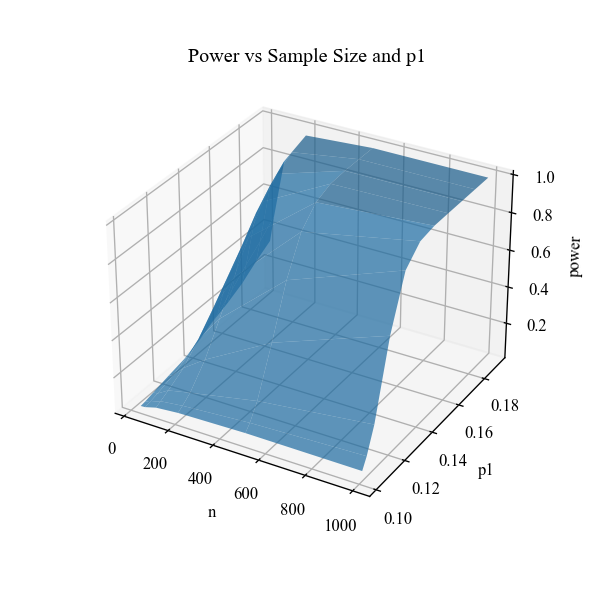

In [71]:
%matplotlib notebook

n_mesh_binom_1, p1_mesh_binom_1 = np.meshgrid(sample_sizes, p1s) 

powers_mesh_binom_1 = np.array(powers_total_binom_1).reshape(len(p1s), len(sample_sizes)) 

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_binom_1, p1_mesh_binom_1, powers_mesh_binom_1, color = 'tab:blue', alpha = 0.7) 
 
ax.set_xlabel('n')
ax.set_ylabel('p1')
ax.set_zlabel('power')
ax.set_title('Power vs Sample Size and p1') 

plt.show()

### difference 0.1

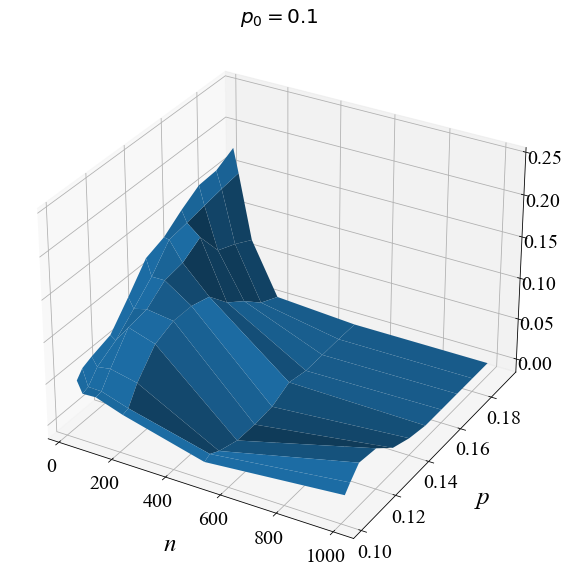

In [74]:
#%matplotlib notebook
%matplotlib inline

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_norm_1, p1_mesh_norm_1, powers_mesh_norm_1 - powers_mesh_binom_1, color = 'tab:blue', alpha = 1) 

# Set labels and title
ax.set_xlabel('n', fontsize = 25, labelpad = 20, fontstyle = 'italic')
ax.set_ylabel('p', fontsize = 25, labelpad = 20, fontstyle = 'italic')
#ax.set_zlabel('power', fontsize = 20, rotation = 150, labelpad = 20, fontstyle = 'italic') 
ax.set_title("$p_0 = 0.1$", fontsize = 20, fontstyle = 'italic') 
#z_label = ax.text2D(.95, .83, 'power', fontsize = 25, fontstyle = 'italic',
                    #transform = ax.transAxes, rotation = 360)

plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 

ax.set_zticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])
ax.set_zticklabels(['0.00', '0.05', '0.10', '0.15', '0.20', '0.25'], fontsize = 20)

ax.view_init(elev = 30, azim = -60)

plt.show()

### 15. 


### $H_0: p = 0,15$ 

### $H_1: p > 0,15$ 

Zakładamy, że prawdziwa jest $H_1$. 

In [134]:
α = 0.05 
p0 = 0.15
z_α = stats.norm.ppf(0.95, 0, 1)
print(z_α) 

sample_sizes = np.array([30, 50, 100, 200, 500, 1000])
print(sample_sizes) 
p1s = np.array( [p0 + 0.002, p0 + 0.005] + list(np.arange(p0 + 0.01, p0 + 0.1, 0.01)) )
print(p1s) 

1.6448536269514722
[  30   50  100  200  500 1000]
[0.152 0.155 0.16  0.17  0.18  0.19  0.2   0.21  0.22  0.23  0.24 ]


### norm 0.15

In [135]:
st = time.time() 

powers_total_norm_15 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n
        z_values = (proportion_estimates - p0) / np.sqrt(p0 * (1 - p0) / n)
        decisions = (z_values < z_α).astype(int)
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_norm_15 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 3.073890447616577 seconds


<IPython.core.display.Javascript object>


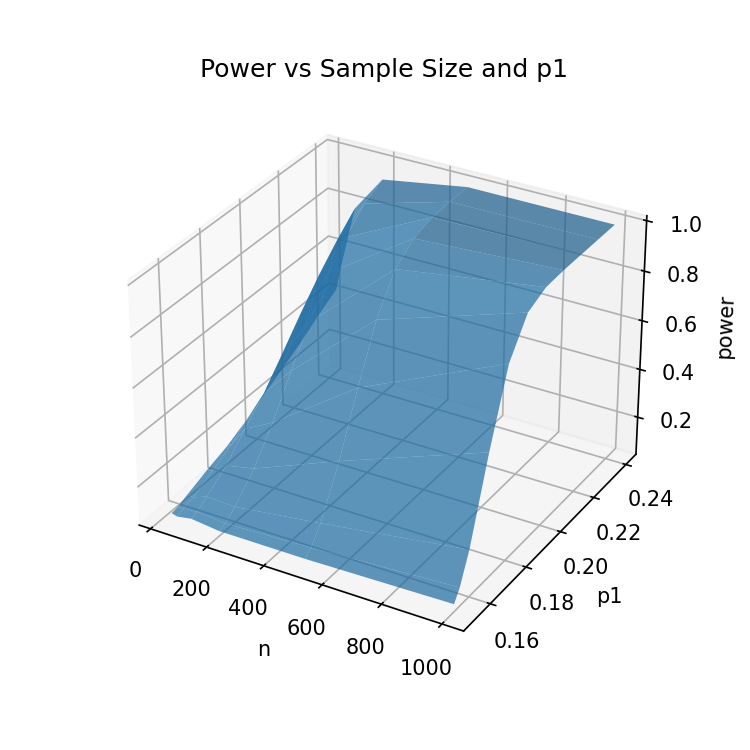

In [136]:
%matplotlib notebook

n_mesh_norm_15, p1_mesh_norm_15 = np.meshgrid(sample_sizes, p1s) 

powers_mesh_norm_15 = np.array(powers_total_norm_15).reshape(len(p1s), len(sample_sizes)) 

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_norm_15, p1_mesh_norm_15, powers_mesh_norm_15, color = 'tab:blue', alpha = 0.7) 

ax.set_xlabel('n')
ax.set_ylabel('p1')
ax.set_zlabel('power')
ax.set_title('Power vs Sample Size and p1') 

plt.show()

### binom 0.15

In [137]:
st = time.time() 

powers_total_binom_15 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n)) 
        ys = samples.sum(axis = 1) 
        
        decisions = [None] * 10000
        
        for i, y in enumerate(ys): 
            result = stats.binomtest(y, n, p0, alternative = "greater")
            if (result.pvalue <= α): 
                decisions[i] = 0 
            else: 
                decisions[i] = 1 
              
        type_II_error_sim = np.mean(decisions)
        power_sim = 1 - type_II_error_sim 
        
        powers_per_n[k] = power_sim 
    
    powers_total_binom_15 += powers_per_n 
    
print()
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds') 


Execution time: 41.22679352760315 seconds


<IPython.core.display.Javascript object>


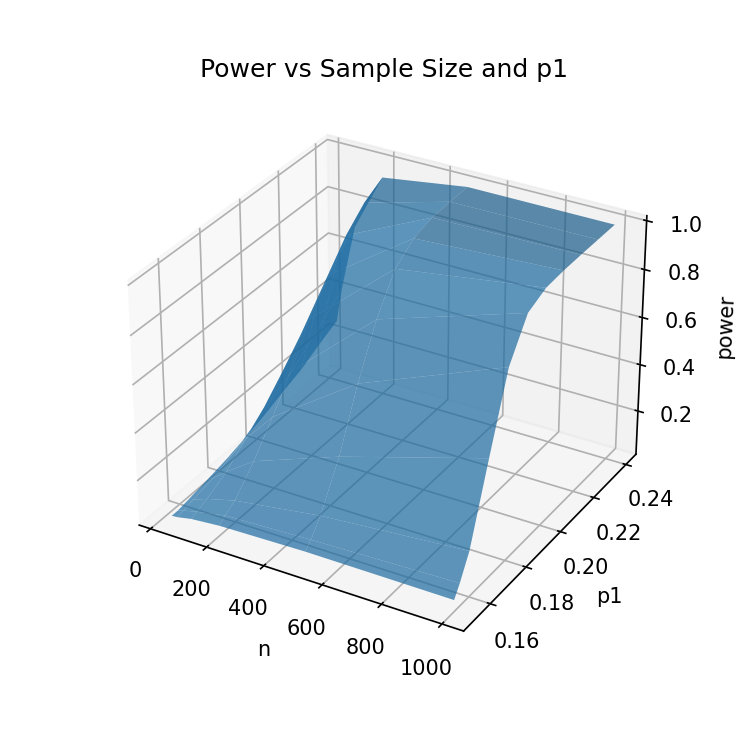

In [138]:
%matplotlib notebook

n_mesh_binom_15, p1_mesh_binom_15 = np.meshgrid(sample_sizes, p1s) 

powers_mesh_binom_15 = np.array(powers_total_binom_15).reshape(len(p1s), len(sample_sizes)) 

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_binom_15, p1_mesh_binom_15, powers_mesh_binom_15, color = 'tab:blue', alpha = 0.7) 
 
ax.set_xlabel('n')
ax.set_ylabel('p1')
ax.set_zlabel('power')
ax.set_title('Power vs Sample Size and p1') 

plt.show()

### difference 0.15

<IPython.core.display.Javascript object>


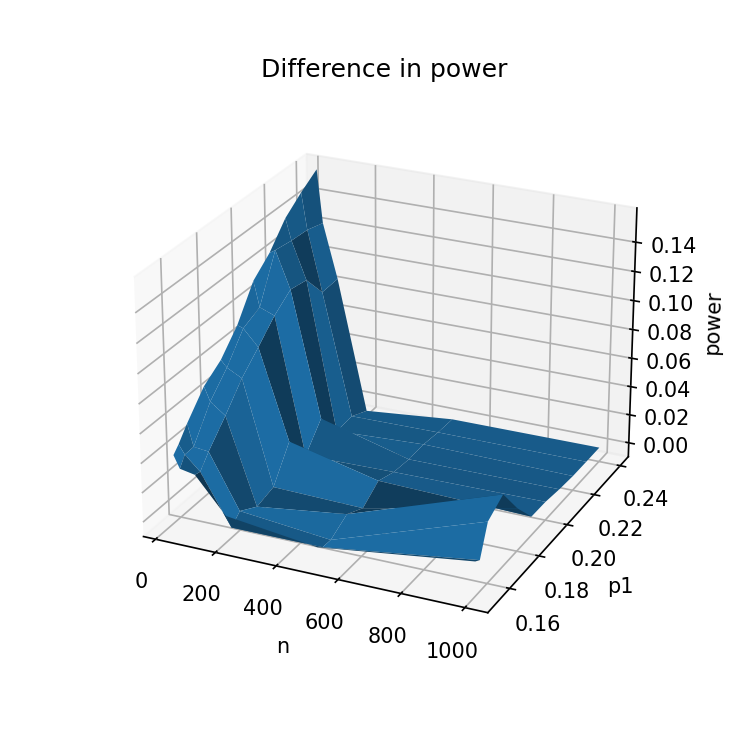

In [140]:
%matplotlib notebook
#%matplotlib inline

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_norm_15, p1_mesh_norm_15, powers_mesh_norm_15 - powers_mesh_binom_15, color = 'tab:blue', alpha = 1) 

ax.set_xlabel('n')
ax.set_ylabel('p1')
ax.set_zlabel('power')
ax.set_title('Difference in power')

#ax.view_init(elev=30, azim=40)

plt.show()

### 20. 


### $H_0: p = 0,2$ 

### $H_1: p > 0,2$ 

Zakładamy, że prawdziwa jest $H_1$. 

In [75]:
α = 0.05 
p0 = 0.2
z_α = stats.norm.ppf(0.95, 0, 1)
print(z_α) 

sample_sizes = np.array([30, 50, 100, 200, 500, 1000])
print(sample_sizes) 
p1s = np.array( [p0 + 0.002, p0 + 0.005] + list(np.arange(p0 + 0.01, p0 + 0.1, 0.01)) )
print(p1s) 

1.6448536269514722
[  30   50  100  200  500 1000]
[0.202 0.205 0.21  0.22  0.23  0.24  0.25  0.26  0.27  0.28  0.29  0.3  ]


### norm 0.2

In [76]:
st = time.time() 

powers_total_norm_2 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n
        z_values = (proportion_estimates - p0) / np.sqrt(p0 * (1 - p0) / n)
        decisions = (z_values < z_α).astype(int)
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_norm_2 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 7.698072910308838 seconds


<IPython.core.display.Javascript object>


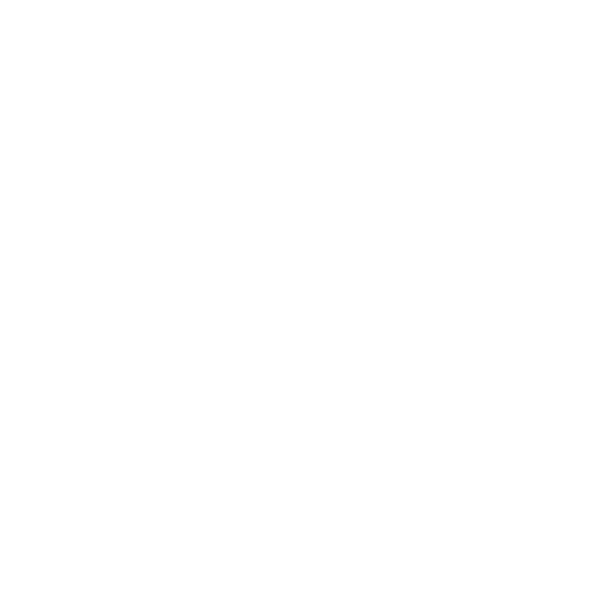

In [77]:
%matplotlib notebook

n_mesh_norm_2, p1_mesh_norm_2 = np.meshgrid(sample_sizes, p1s) 

powers_mesh_norm_2 = np.array(powers_total_norm_2).reshape(len(p1s), len(sample_sizes)) 

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_norm_2, p1_mesh_norm_2, powers_mesh_norm_2, color = 'tab:blue', alpha = 0.7) 

ax.set_xlabel('n')
ax.set_ylabel('p1')
ax.set_zlabel('power')
ax.set_title('Power vs Sample Size and p1') 

plt.show()

### binom 0.2

In [78]:
st = time.time() 

powers_total_binom_2 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n)) 
        ys = samples.sum(axis = 1) 
        
        decisions = [None] * 10000
        
        for i, y in enumerate(ys): 
            result = stats.binomtest(y, n, p0, alternative = "greater")
            if (result.pvalue <= α): 
                decisions[i] = 0 
            else: 
                decisions[i] = 1 
              
        type_II_error_sim = np.mean(decisions)
        power_sim = 1 - type_II_error_sim 
        
        powers_per_n[k] = power_sim 
    
    powers_total_binom_2 += powers_per_n 
    
print()
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds') 


Execution time: 103.11068820953369 seconds


<IPython.core.display.Javascript object>


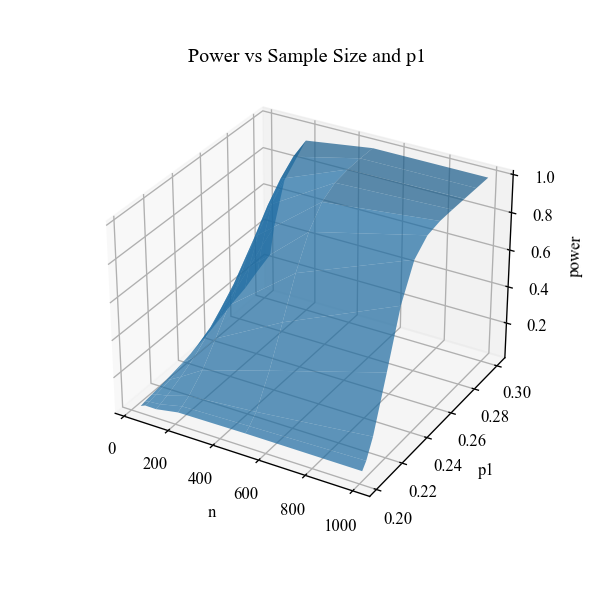

In [79]:
%matplotlib notebook

n_mesh_binom_2, p1_mesh_binom_2 = np.meshgrid(sample_sizes, p1s) 

powers_mesh_binom_2 = np.array(powers_total_binom_2).reshape(len(p1s), len(sample_sizes)) 

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_binom_2, p1_mesh_binom_2, powers_mesh_binom_2, color = 'tab:blue', alpha = 0.7) 
 
ax.set_xlabel('n')
ax.set_ylabel('p1')
ax.set_zlabel('power')
ax.set_title('Power vs Sample Size and p1') 

plt.show()

### difference 0.2

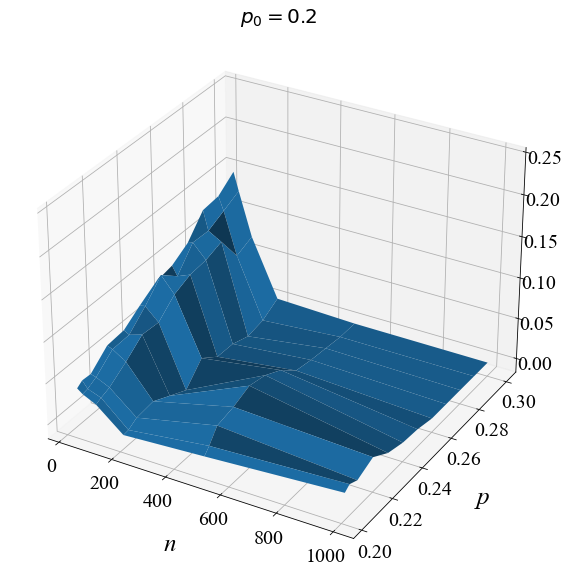

In [80]:
#%matplotlib notebook
%matplotlib inline

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_norm_2, p1_mesh_norm_2, powers_mesh_norm_2 - powers_mesh_binom_2, color = 'tab:blue', alpha = 1) 

# Set labels and title
ax.set_xlabel('n', fontsize = 25, labelpad = 20, fontstyle = 'italic')
ax.set_ylabel('p', fontsize = 25, labelpad = 20, fontstyle = 'italic')
#ax.set_zlabel('power', fontsize = 20, rotation = 150, labelpad = 20, fontstyle = 'italic') 
ax.set_title("$p_0 = 0.2$", fontsize = 20, fontstyle = 'italic') 
#z_label = ax.text2D(.95, .83, 'power', fontsize = 25, fontstyle = 'italic',
                    #transform = ax.transAxes, rotation = 360)

plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 

ax.set_zticks([0, 0.05, 0.1, 0.15, 0.2, 0.25])
ax.set_zticklabels(['0.00', '0.05', '0.10', '0.15', '0.20', '0.25'], fontsize = 20)

ax.view_init(elev = 30, azim = -60)

plt.show()